In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ads_df = pd.read_csv("D:/Academics/AI/Simplilearn/Data Sets/Social Network Ads.csv")

In [3]:
ads_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
ads_df = ads_df.drop(['User ID', 'Gender'], axis=1)

In [5]:
ads_df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(ads_df.drop('Purchased', axis =1), ads_df['Purchased'], test_size=0.3, random_state=0)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(280, 2)
(280,)
(120, 2)
(120,)


In [9]:
from sklearn.preprocessing import StandardScaler

**Instanciate the estimator object**

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(X_train)

StandardScaler()

**Transform the Train and Test set**

In [12]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [17]:
X_train.head()

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000


In [15]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [18]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [19]:
X_train_scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [21]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


### **Effect of Scaling**

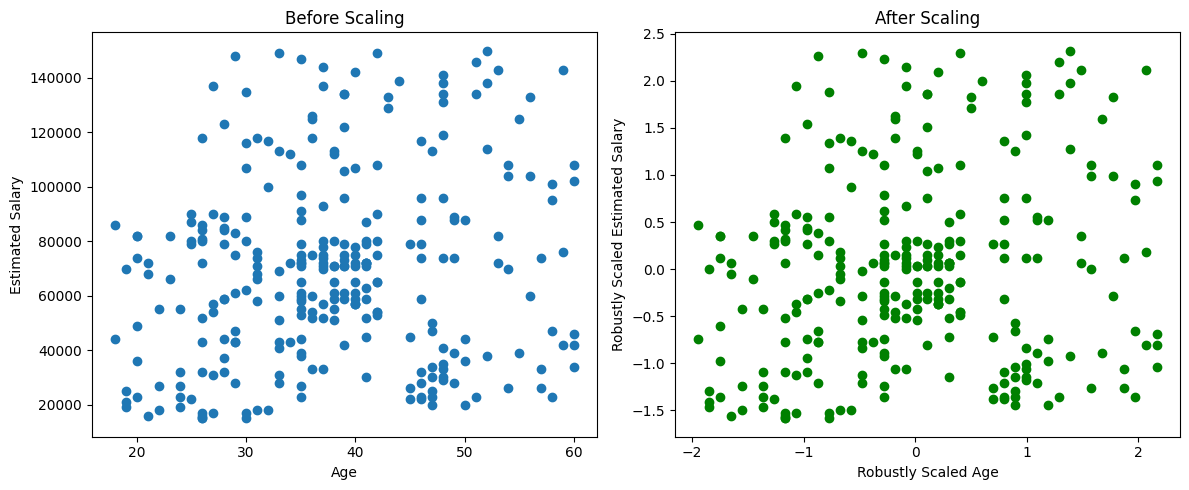

In [30]:
plt.figure(figsize=(12, 5))

# Before Scaling
plt.subplot(1, 2, 1)
plt.scatter(X_train['Age'], X_train['EstimatedSalary'])
plt.title("Before Scaling")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")

# After Scaling
plt.subplot(1, 2, 2)
plt.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='green')
plt.title("After Scaling")
plt.xlabel("Robustly Scaled Age")
plt.ylabel("Robustly Scaled Estimated Salary")

plt.tight_layout()
plt.show()

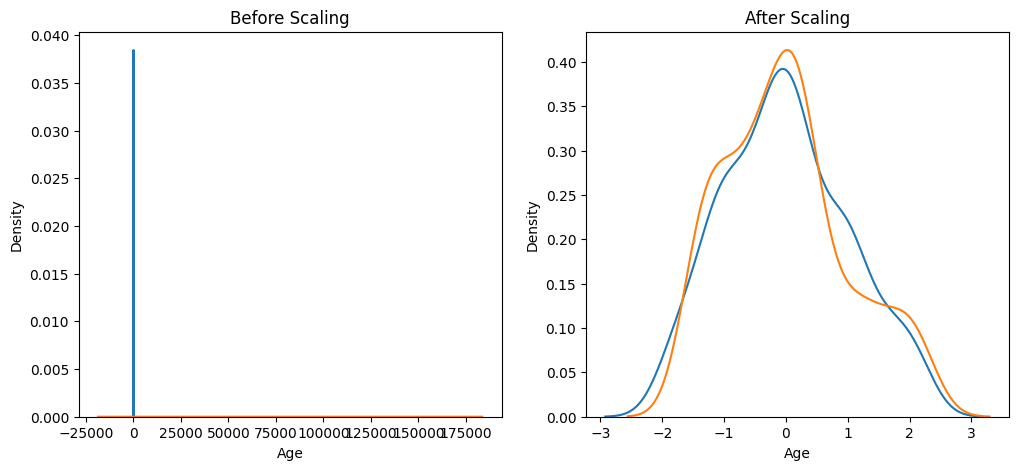

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# Before Scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# After Scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

## **Importance of Scaling**

In [36]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [39]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [40]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [45]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [46]:
dt_y_pred = dt.predict(X_test)
dt_y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [47]:
print('Actual', accuracy_score(y_test, dt_y_pred))
print('Scaled', accuracy_score(y_test, dt_y_pred_scaled))

Actual 0.8666666666666667
Scaled 0.8666666666666667
